# CSX46 - Class Session 7 - Closeness centrality

In this class session we are going to scatter-plot the harmonic-mean closeness centralities
of the vertices in the gene regulatory network (which we will obtain from Pathway Commons) with the vertices' degree centralities. We will get the geodesic path distances using `igraph`, which will use BFS for this graph.

We are going to use igraph

In [3]:
suppressPackageStartupMessages(library(igraph))

Load in the SIF file for Pathway Commons into a data frame `sif_data` using `read.table`, and assign column names `species1`, `interaction_type`, and `species2` to the data frame:

In [4]:
sif_data <- read.table("shared/pathway_commons.sif",
                       header=FALSE,
                       stringsAsFactors=FALSE,
                       col.names=c("species1",
                                   "interaction_type",
                                   "species2"),
                       quote="",
                       comment.char="")

Restrict the rows of the dataframe to "controls-expression-of", restrict to columns 1 and 3, and eliminate redundant edges in the edge-list. 

In [5]:
interac_grn <- sif_data[sif_data$interaction_type %in% c("controls-expression-of"), c(1,3)]
interac_grn_unique <- unique(interac_grn)

Create a directed graph in igraph, from the dataframe edge-list, using `graph_from_data_frame`. Print a graph summary too, just as a sanity check.

In [6]:
grn_igraph <- graph_from_data_frame(interac_grn_unique, directed=TRUE)

For one vertex at a time, compute that vertex's harmonic mean closeness centrality using Eq. 7.30 from Newman's book. Don't forget to eliminate the "0" distance between a vertex and itself, in the results you get back from calling `distances`.  VERY IMPORTANT: make sure you specify a single source vertex to the `distances` function!  Just for information purposes, wrap system.time around your code. Distances should be calculated on the undirected graph, regardless of edge direction (this appears to be the default for `distances`).  You'll use the `V` function to get the vertices of the graph `grn_igraph`.  You'll use the `sapply` function to run for each of these vertices, a function that computes the vertex harmonic-mean closeness centrality.

In [7]:
N <- length(V(grn_igraph))
harmonic_closeness_centralities <- sapply(V(grn_igraph),
                                            function(my_vertex) {
                                                my_dists <- distances(grn_igraph, v=my_vertex)
                                                sum(1/my_dists[my_dists > 0])/(N-1)
                                          })

Histogram the harmonic-mean closeness centralities.  Do they have a large dynamic range?

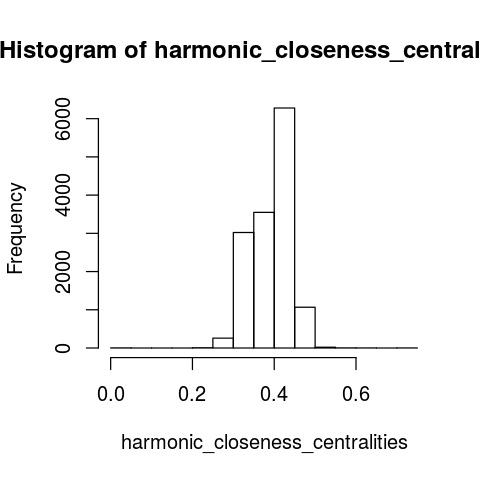

In [17]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
hist(harmonic_closeness_centralities)

Scatter plot the harmonic-mean closeness centralities vs. the log10 degree. Is there any kind of relationship?

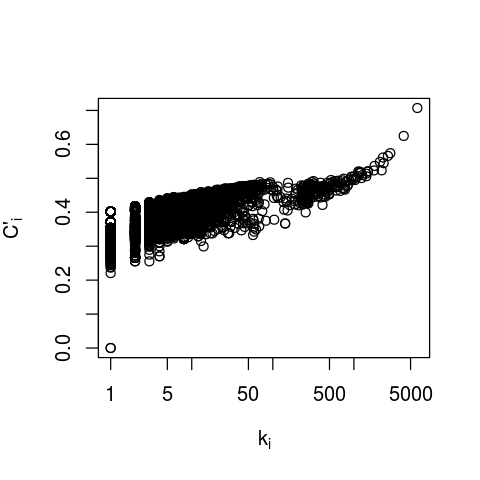

In [18]:
plot(degree(grn_igraph), harmonic_closeness_centralities,
     xlab=expression(k[i]),
     ylab=expression("C'"[i]),
     log="x")

which protein has the highest closeness centrality in the network? (hint: use `which.max`)

In [9]:
harmonic_closeness_centralities[which.max(harmonic_closeness_centralities)]

CYP26A1 
0.707169

In [11]:
which.max(degree(grn_igraph))

CYP26A1 
    163

Print the harmonic-mean closeness centralities of the top 10  proteins in the network:

In [14]:
head(sort(round(harmonic_closeness_centralities, 3), decreasing=TRUE), n=10)

CYP26A1    TCF3    LEF1     MYC     MAZ   FOXO4     MAX    PAX4   PPARA  SREBF1 
  0.707   0.625   0.574   0.566   0.561   0.548   0.545   0.537   0.523   0.523